In [96]:
#Importing the necessary libraries
import warnings
warnings.filterwarnings("ignore")   #Ignore Warning
import re
import string                       #String Operations
import numpy as np                  #Linear ALgebra(for calulating mean and std)
import pandas as pd                 #Data Processing and manipulating data 
import os
import matplotlib.pyplot as plt                       #For Visualiztion 
import seaborn as sns
from sklearn.model_selection import train_test_split  #For Splitting the data into test and training data
from  nltk.corpus import stopwords                    # library for Natural Language Processing           
from wordcloud import WordCloud                        # Creating a Wordcloud to display words 

#Importing various ML algorithms from Sklearn and Metrics for evaluation of the Model
from sklearn.svm import LinearSVC                     
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn import model_selection, naive_bayes, svm

In [40]:
#training dataset
twitter_info  = pd.read_csv(r"C:\Users\Benjamin\Desktop\icon\Downloads\datascience twitter analysis\train.csv")

In [41]:
#first five observtions
twitter_info.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [87]:
#Displaying the columns in the dataset
twitter_info.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [88]:
# Displaying the last 5 observations 
twitter_info.tail()

,id,label,tweet
31957,31958,0,ate user isz youuuððððððð...
31958,31959,0,see nina turner airwaves trying wrap mantle ge...
31959,31960,0,listening sad songs monday morning otw work sad
31960,31961,1,user sikh temple vandalised calgary wso condem...
31961,31962,0,thank user follow


In [44]:
#Length of the dataset
print('length of data is', len(twitter_info))

length of data is 31962


In [45]:
#Columns and observations
twitter_info.shape

(31962, 3)

In [46]:
#more insight on the dataset
twitter_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [47]:
# More insight on the data
twitter_info.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [48]:
#Displaying all the different datatypes in the dataset
twitter_info.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [49]:
print('Count of columns in the data is:  ', len(twitter_info.columns))
print('Count of rows in the data is:  ', len(twitter_info))

Count of columns in the data is:   3
Count of rows in the data is:   31962


In [89]:
#Finding Null Values 
twitter_info.isna()

,id,label,tweet
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
31957,False,False,False
31958,False,False,False
31959,False,False,False
31960,False,False,False


In [51]:
# Null values 
twitter_info.isnull() == True

,id,label,tweet
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
31957,False,False,False
31958,False,False,False
31959,False,False,False
31960,False,False,False


## Using Natural language Processing

In [52]:
#Displaying the first 50 stopwords in english
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [53]:
#Removing the stopwords 
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
twitter_info['tweet'] = twitter_info['tweet'].apply(lambda text: cleaning_stopwords(text))
twitter_info['tweet'].head()

0    @user father dysfunctional selfish drags kids ...
1    @user @user thanks #lyft credit can't use caus...
2                                       bihday majesty
3    #model love u take u time urð±!!! ððð...
4                      factsguide: society #motivation
Name: tweet, dtype: object

In [54]:
type(twitter_info)

pandas.core.frame.DataFrame

In [55]:
#Removing all Punctuations 
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
twitter_info['tweet']= twitter_info['tweet'].apply(lambda x: cleaning_punctuations(x))
twitter_info['tweet'].tail()

31957    ate user isz youuuððððððð...
31958    see nina turner airwaves trying wrap mantle ge...
31959      listening sad songs monday morning otw work sad
31960    user sikh temple vandalised calgary wso condem...
31961                                    thank user follow
Name: tweet, dtype: object

In [90]:
#Creating a function to remove the numeric values 
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
twitter_info['tweet'] = twitter_info['tweet'].apply(lambda x: cleaning_numbers(x))
twitter_info['tweet'].tail()

31957    ate user isz youuuððððððð...
31958    see nina turner airwaves trying wrap mantle ge...
31959      listening sad songs monday morning otw work sad
31960    user sikh temple vandalised calgary wso condem...
31961                                    thank user follow
Name: tweet, dtype: object

In [57]:
# Applying stemming to break words to its stem
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
twitter_info['tweet']= twitter_info['tweet'].apply(lambda x: stemming_on_text(x))
twitter_info['tweet'].head()

0    user father dysfunctional selfish drags kids d...
1    user user thanks lyft credit cant use cause do...
2                                       bihday majesty
3    model love u take u time urð± ðððð...
4                        factsguide society motivation
Name: tweet, dtype: object

In [91]:
# Seting all the tweets in the data to lowercase
twitter_info['tweet'] = [entry.lower() for entry in twitter_info['tweet']]

In [59]:
#displaying the data 
twitter_info

,id,label,tweet
0,1,0,user father dysfunctional selfish drags kids d...
1,2,0,user user thanks lyft credit cant use cause do...
2,3,0,bihday majesty
3,4,0,model love u take u time urð± ðððð...
4,5,0,factsguide society motivation
...,...,...,...
31957,31958,0,ate user isz youuuððððððð...
31958,31959,0,see nina turner airwaves trying wrap mantle ge...
31959,31960,0,listening sad songs monday morning otw work sad
31960,31961,1,user sikh temple vandalised calgary wso condem...


## 1 - Negative Tweets 
## 0 -  Positive Tweets 

In [61]:
#Seperating the negative tweets from  Positive tweets 
data_pos = twitter_info[twitter_info['label'] == 0]
data_neg = twitter_info[twitter_info['label'] == 1]

## Data Visualization

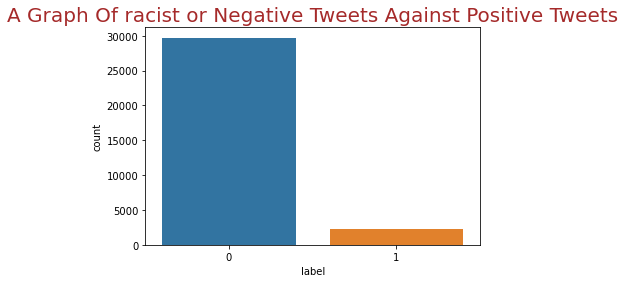

In [92]:
# 1 - Negative
# 0 - Positive
sns.countplot(x='label', data=twitter_info)
plt.title("A Graph Of racist or Negative Tweets Against Positive Tweets" , fontsize = 20 , color = "brown")
plt.show()

In [63]:
# Joining the positive and negative tweets 
twitter_concat = pd.concat([data_pos, data_neg])

In [64]:
twitter_concat['tweet']=twitter_concat['tweet'].str.lower()
twitter_concat['tweet'].tail()

31934      lady banned kentucky mall user jcpenny kentucky
31946    user omfg im offended im mailbox im proud mail...
31947    user user dont balls hashtag but say weasel aw...
31948       makes ask yourself i anybody god  oh thank god
31960    user sikh temple vandalised calgary wso condem...
Name: tweet, dtype: object

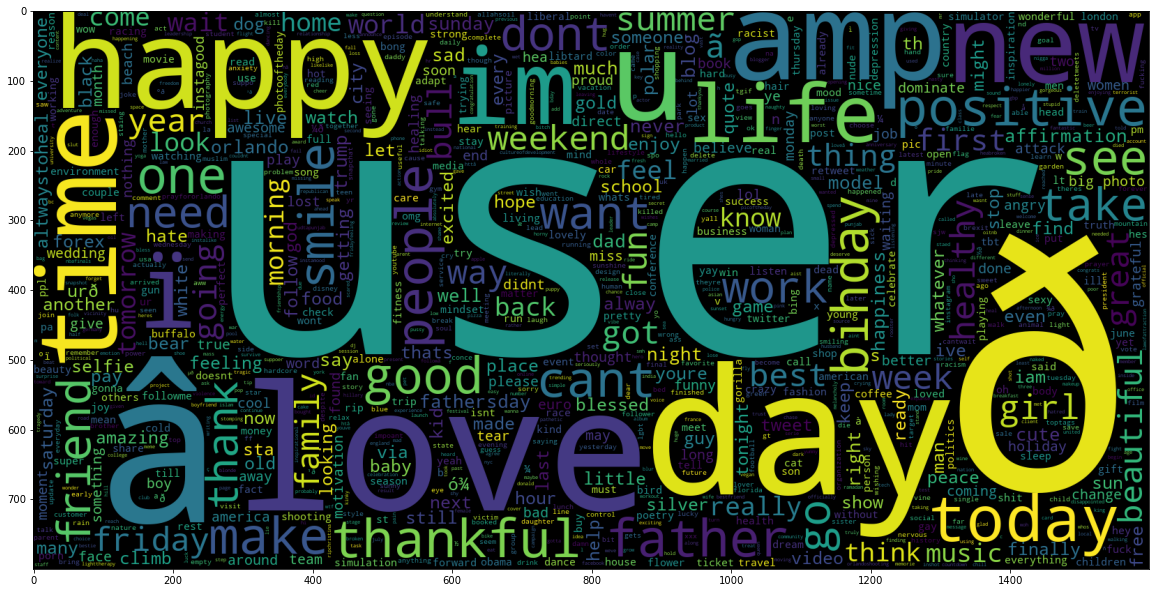

In [65]:
# Creating a wordCloud to display the Positive tweets
data_pos = twitter_info['tweet']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)
plt.show()



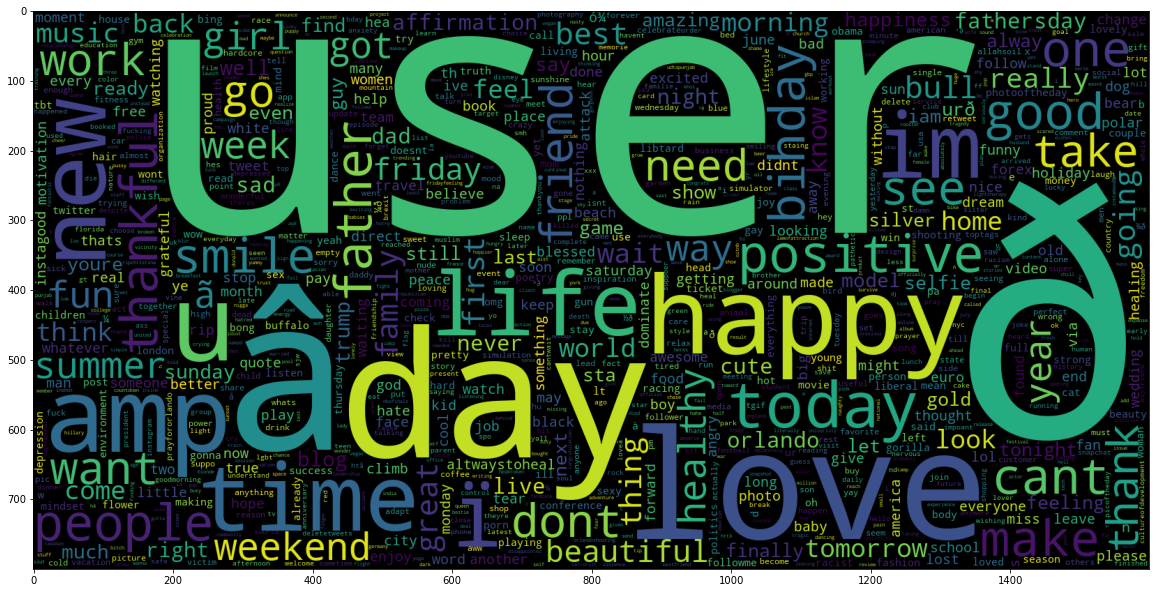

In [66]:
data_neg = twitter_info['tweet'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.show()

In [67]:
## Seperating the input features and label
X = twitter_info.tweet
y = twitter_info.label

In [68]:
#Splitting the data into test and training data to train Model
X_test,X_train,y_test,y_train =train_test_split(X,y,test_size=0.2 , random_state=20)

## Transforming Dataset using TF-IDF Vectorizer

### Fitting the model 

In [36]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectorizer.fit(X_train)
print('Number of feature_words: ', len(vectorizer.get_feature_names_out()))
# Tfidf_vect = TfidfVectorizer(max_features=5000)
# Tfidf_vect.fit(twitter_info['tweet'])
# print('Number of feature_words: ', len(vectorizer.get_feature_names_out()))

Number of feature_words:  54356


### THe words the model has learned from the corpus

In [37]:
# print(vectorizer.vocabulary_)

## Transform the data using TF-IDF Vectorizer

In [69]:
#Converting the Features into a numerical form to be used by the algorithm
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

## Evaluation Model 

## fit the training dataset on the Naive Bayes classifier

In [70]:
Naive =  naive_bayes.MultinomialNB()

## Training the model 

In [71]:
Naive.fit(X_train , y_train)

MultinomialNB()

## Predicting the labels from the dataset

In [72]:
predictions_NB = Naive.predict(X_test)

In [73]:
print("The accuracy of the model is {}%".format(accuracy_score(predictions_NB , y_test) * 100))

The accuracy of the model is 93.43345457389808%


## Using SVM Classifier algorithm

### Fitting the training data set 

In [74]:
# Using the SVM algorithm
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

In [75]:
SVM.fit(X_train , y_train)

SVC(gamma='auto', kernel='linear')

### Predicting the labels on validation dataset


In [82]:
predictions_SVM = SVM.predict(X_test)

## Checking the Accuracy Score of the model


In [85]:
print("SVM Accuracy Score is {}%".format(accuracy_score(predictions_SVM, y_test) * 100))

SVM Accuracy Score is 95.0017599436818%


## Classification Report

In [93]:
print(classification_report(y_test , predictions_SVM))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     23774
           1       0.89      0.33      0.48      1795

    accuracy                           0.95     25569
   macro avg       0.92      0.66      0.73     25569
weighted avg       0.95      0.95      0.94     25569



## Confusion Matrix

In [94]:
cf_matrix = confusion_matrix(y_test , predictions_SVM)

In [95]:
print("Confusion Matrix \n" , cf_matrix)

Confusion Matrix 
 [[23700    74]
 [ 1204   591]]


## Visualization of the confusion  matrix

<AxesSubplot:>

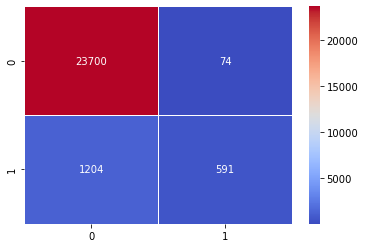

In [97]:
sns.heatmap(cf_matrix , cmap = 'coolwarm' , annot=True , linewidths=1 , fmt='d')